In [219]:
# Import the pandas, numpy libraries as pd, and np respectively. 
# Load the pyplot collection of functions from matplotlib, as plt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
# Make a variable called url_LondonHousePrices, and assign it the link with the London Housing Dataset
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in the Average prices of the houses on a particular sheet of the Excel file, which is specified in sheet_name. 
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
print(properties.head())

  Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

In [221]:
# Transpose table
properties = properties.transpose().reset_index()
#Set first row (dates) to column names
properties.columns = properties.iloc[0]
properties = properties[1:]
#Rename columns
properties = properties.rename(columns={"Unnamed: 0": "London_Borough", pd.NaT: 'ID'})
print(properties.head())

0      London_Borough         ID 1995-01-01 00:00:00 1995-02-01 00:00:00  \
1      City of London  E09000001               90347               81213   
2  Barking & Dagenham  E09000002               51870               52513   
3              Barnet  E09000003               98948               98848   
4              Bexley  E09000004               64956               64786   
5               Brent  E09000005               76880               77651   

0 1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
1               78168               76172               83392   
2               52701               54618               54524   
3               97848               96273               95737   
4               64366               64276               63995   
5               77644               78668               79464   

0 1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  ...  \
1               93757              108801              110976  ...   
2           

In [222]:
# Find missing data and remove the empty rows
null_bool = properties.isnull().any(axis=1)
print(properties[null_bool == True])  
properties = properties[null_bool == False]

0  London_Borough   ID 1995-01-01 00:00:00 1995-02-01 00:00:00  \
34    Unnamed: 34  NaN                 NaN                 NaN   
37    Unnamed: 37  NaN                 NaN                 NaN   
47    Unnamed: 47  NaN                 NaN                 NaN   

0  1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
34                 NaN                 NaN                 NaN   
37                 NaN                 NaN                 NaN   
47                 NaN                 NaN                 NaN   

0  1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  ...  \
34                 NaN                 NaN                 NaN  ...   
37                 NaN                 NaN                 NaN  ...   
47                 NaN                 NaN                 NaN  ...   

0  2024-10-01 00:00:00 2024-11-01 00:00:00 2024-12-01 00:00:00  \
34                 NaN                 NaN                 NaN   
37                 NaN                 NaN           

In [223]:
#Confirm all NaN have been removed
print(properties.isnull().values.any())

False


In [ ]:
#Remove extra rows that are not individual boroughs, keeping LONDON so that it can be used as a comparison later
print(properties.iloc[:, 0])
prop_boroughs_L = properties.iloc[list(range(33)) + [41], :]
print(prop_boroughs_L.iloc[:, 0])

1           City of London
2       Barking & Dagenham
3                   Barnet
4                   Bexley
5                    Brent
6                  Bromley
7                   Camden
8                  Croydon
9                   Ealing
10                 Enfield
11               Greenwich
12                 Hackney
13    Hammersmith & Fulham
14                Haringey
15                  Harrow
16                Havering
17              Hillingdon
18                Hounslow
19               Islington
20    Kensington & Chelsea
21    Kingston upon Thames
22                 Lambeth
23                Lewisham
24                  Merton
25                  Newham
26               Redbridge
27    Richmond upon Thames
28               Southwark
29                  Sutton
30           Tower Hamlets
31          Waltham Forest
32              Wandsworth
33             Westminster
35            Inner London
36            Outer London
38              NORTH EAST
39              NORTH WEST
4

In [225]:
#Melt table, rename columns and make Average_price column and float
clean_properties = pd.melt(prop_boroughs_L, id_vars= ['London_Borough', 'ID'])
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})
print(clean_properties.head())
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
print(clean_properties.dtypes)

       London_Borough         ID                Month Average_price
0      City of London  E09000001  1995-01-01 00:00:00         90347
1  Barking & Dagenham  E09000002  1995-01-01 00:00:00         51870
2              Barnet  E09000003  1995-01-01 00:00:00         98948
3              Bexley  E09000004  1995-01-01 00:00:00         64956
4               Brent  E09000005  1995-01-01 00:00:00         76880
London_Borough    object
ID                object
Month             object
Average_price      int64
dtype: object


In [226]:
#Set the cleaned data set to variable name df
df = clean_properties

In [227]:
#Make new column with average price for the year for each borough
df['Year'] = df['Month'].apply(lambda t: t.year)
df['AP_Year'] = df.groupby(['London_Borough', 'Year'])['Average_price'].transform('mean')
# Make new data frame with one row/burough/year
df_unique = df.groupby(['London_Borough', 'Year'], as_index=False).agg({
    'AP_Year': 'mean'})
print(df_unique.head())

       London_Borough  Year       AP_Year
0  Barking & Dagenham  1995  53265.416667
1  Barking & Dagenham  1996  53162.666667
2  Barking & Dagenham  1997  57537.583333
3  Barking & Dagenham  1998  61969.666667
4  Barking & Dagenham  1999  67145.333333


In [242]:
# Pivot table back woth rows as boroughs and columns as years with AP_Year as values
df_pivot = df_unique.pivot_table(index='London_Borough', columns='Year', values='AP_Year').reset_index(drop=False)
# Make new columns for price change over decades
df_pivot['2015-2025'] = df_pivot[2025]-df_pivot[2015]
df_pivot['2005-2015'] = df_pivot[2015]-df_pivot[2005]
df_pivot['1995-2005'] = df_pivot[2005]-df_pivot[1995]
df_pivot['20 years (2005-2025)'] = df_pivot[2025]-df_pivot[2005]
print(df_pivot.columns)

Index([      'London_Borough',                   1995,                   1996,
                         1997,                   1998,                   1999,
                         2000,                   2001,                   2002,
                         2003,                   2004,                   2005,
                         2006,                   2007,                   2008,
                         2009,                   2010,                   2011,
                         2012,                   2013,                   2014,
                         2015,                   2016,                   2017,
                         2018,                   2019,                   2020,
                         2021,                   2022,                   2023,
                         2024,                   2025,            '2015-2025',
                  '2005-2015',            '1995-2005', '20 years (2005-2025)'],
      dtype='object', name='Year')


In [239]:
#Set London as separate df for later inclusion in graphs for comparison
London = df_pivot[df_pivot.iloc[:, 0] == 'LONDON']
columns = ['20 years (2005-2025)', '1995-2005', '2005-2015', '2015-2025'] #Remember the columns variable, it will be used multiple times later
London_list = [London[[London.columns[0], col]] for col in columns]
print(London)
print(London_list)
df_pivot = df_pivot[df_pivot.iloc[:, 0] != 'LONDON']
print(df_pivot.tail())

Year London_Borough          1995          1996      1997           1998  \
21           LONDON  79993.083333  83681.166667  96289.75  109314.833333   

Year           1999           2000       2001           2002           2003  \
21    123848.333333  152025.583333  170459.75  200617.083333  225994.583333   

Year  ...       2020           2021           2022       2023           2024  \
21    ...  517773.25  535453.666667  565955.416667  558023.75  556218.666667   

Year      2025  2015-2025  2005-2015      1995-2005  20 years (2005-2025)  
21    561310.0  106181.25  203196.25  171939.416667              309377.5  

[1 rows x 36 columns]
[Year London_Borough  20 years (2005-2025)
21           LONDON              309377.5, Year London_Borough      1995-2005
21           LONDON  171939.416667, Year London_Borough  2005-2015
21           LONDON  203196.25, Year London_Borough  2015-2025
21           LONDON  106181.25]
Year  London_Borough           1995           1996           1997  \


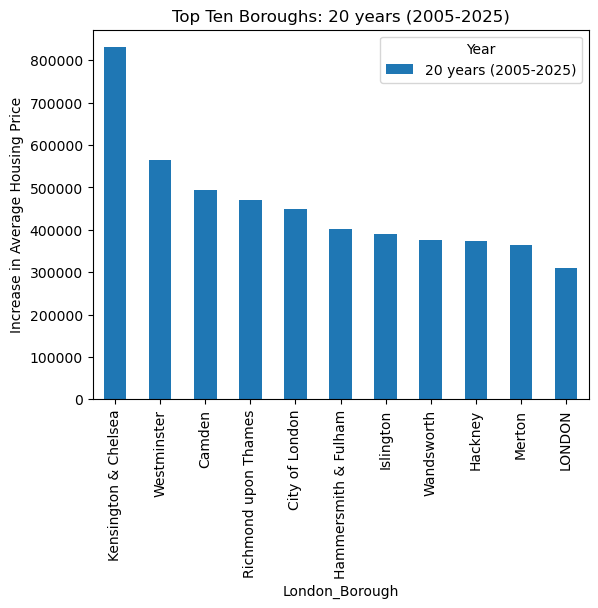

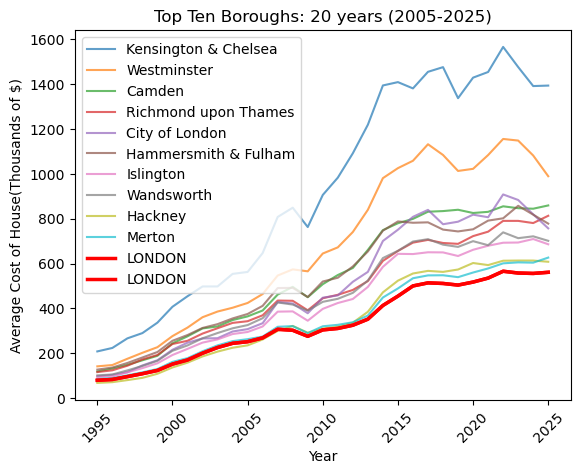

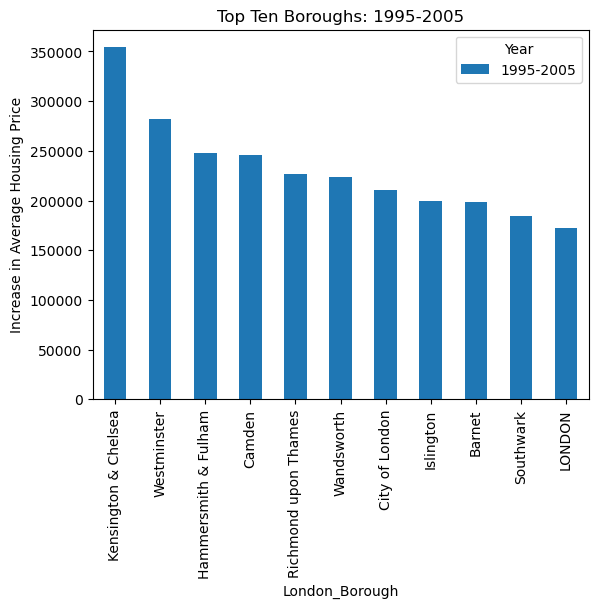

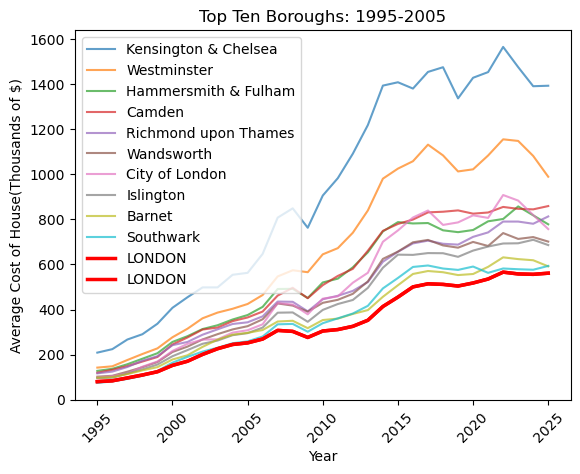

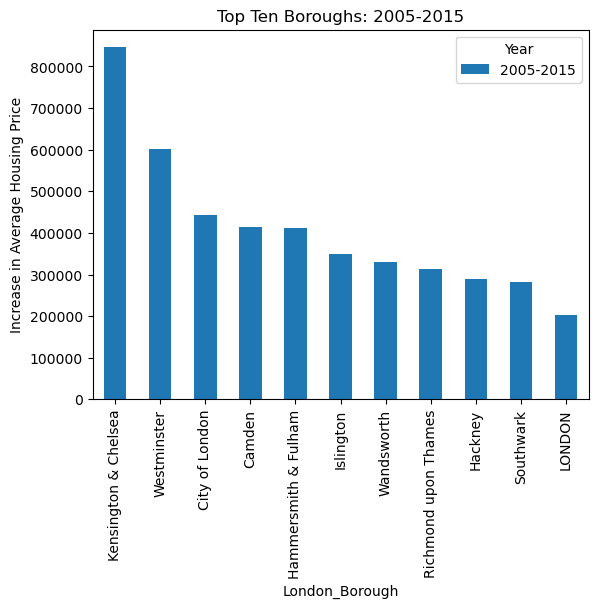

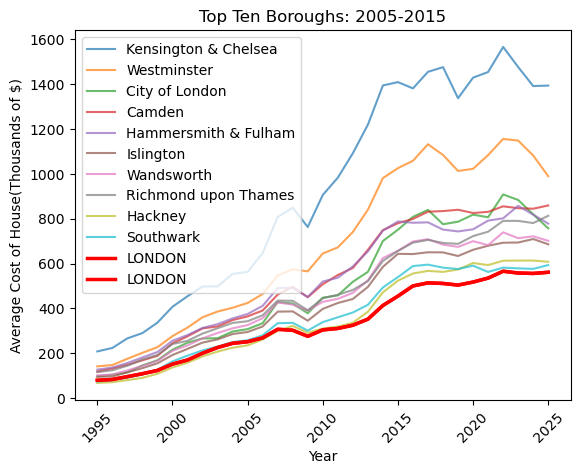

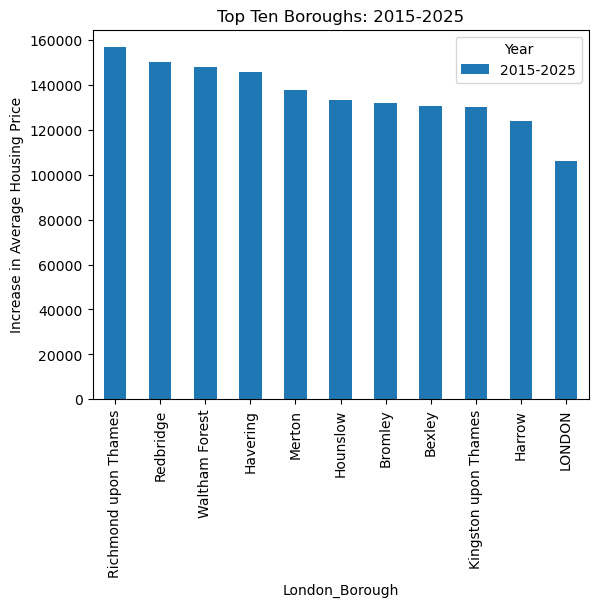

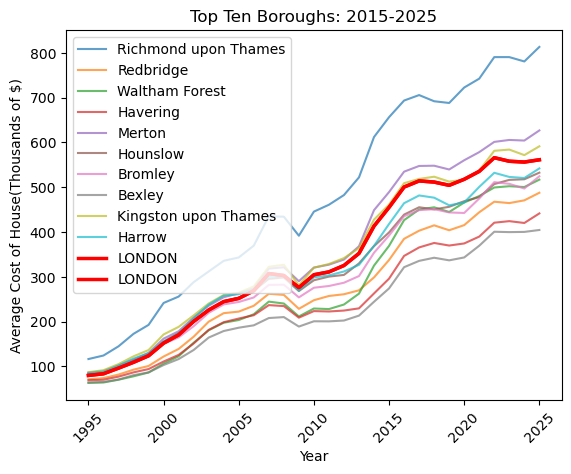

In [244]:
#Run analysis to find the ten boroughs with the greatest increase in housing price over the 4 time frames defined in columns.
#Plot the sorted differences as bar graphs
#Plot raw data from the top ten boroughs in each time frame as line graphs to show actual changes in housing costs
#Include the average LONDON as a comparison in all graphs
def top_ten(df, col, London_list):
    """Sort and slice df for highest ten values in col, make new df (top10) with col[0] and col for selected rows"""
    df_sort = df.sort_values(col, ascending=False)  #Sort by column in question
    top10 = df_sort[[df_sort.columns[0], col]].head(10)  #Slice top ten
    London_df = next(l for l in London_list if col in l.columns)
    top10 = pd.concat([top10, London_df], ignore_index=True) # Concatenate London at the bottom
    return top10

def top10_bargraph(df, col):
    """Make 'Top Ten Boroughs' bargraph of df with boroughs as labels and col as values"""
    df_indexed = df.set_index(df.columns[0]) #Sets the labels to borough name instead of index number
    df_indexed.plot(kind='bar', title=f"Top Ten Boroughs: {col}", xlabel='London_Borough', ylabel='Increase in Average Housing Price')
    plt.xticks(rotation=90)
    plt.show()

def top_ten_full(top10, df, col, London):
    """Using subet df (aka top10), make a new df (top10_full) with the full raw data rows for boroughs in top10"""
    top10_list = [i for i in top10.iloc[:, 0]] # Make list of boroughs in df1 col[0]
    top10_full = df[df['London_Borough'].isin(top10_list)].sort_values(col, ascending=False) #Keep rows for boroughs in the top10
    top10_full = pd.concat([top10_full, London], ignore_index=True) # Concatinate with London for comparison
    top10_full = top10_full.iloc[:, :-4] # Remove last four columns with conglomerate data
    return top10_full

def top10_linegraph(df, col):
    """Make 'Top Ten Boroughs' linegraph of df with boroughs as labels and rows as values"""
    numeric_cols = df.columns[1:]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    for _, row in df.iterrows(): #Loop gives the LONDON average a thick red line for easier interpretation
        if row['London_Borough'].upper() == 'LONDON':
            plt.plot(numeric_cols, row[numeric_cols]/1000, label=row['London_Borough'], color='red', linewidth=2.5)
        else:
            plt.plot(numeric_cols, row[numeric_cols]/1000, label=row['London_Borough'], alpha=0.7)
    plt.xlabel("Year")
    plt.ylabel("Average Cost of House(Thousands of $)")  
    plt.title(f"Top Ten Boroughs: {col}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

for col in columns:
    top10 = top_ten(df_pivot, col, London_list)
    top10_full = top_ten_full(top10, df_pivot, col, London)
    top10_bargraph(top10, col)
    top10_linegraph(top10_full, col)

In [245]:
# Greatest increase doesn't necessarily mean most expensive. 
# Is the cause of the increase cheap areas catching up or expensive areas getting more expesive?
# Start df_cost and add columns with average housing cost in 2001-2005 and 2021-2025 for all boroughs
df_cost = pd.DataFrame()
df_cost['London_Borough'] = df_pivot['London_Borough']
cols1 = list(range(2001, 2006))
cols2 = list(range(2021, 2026))
df_cost['2001-2005'] = df_pivot[cols1].mean(axis=1)
df_cost['2021-2025'] = df_pivot[cols2].mean(axis=1)
print(df_cost.head(10))

       London_Borough      2001-2005      2021-2025
0  Barking & Dagenham  136698.450000  342077.316667
1              Barnet  256444.466667  611064.540476
2              Bexley  156687.750000  394992.673810
3               Brent  223695.766667  554680.538095
4             Bromley  211392.616667  503089.028571
5              Camden  324071.516667  847404.538095
6      City of London  277394.916667  835058.783333
7             Croydon  178099.966667  403300.416667
8              Ealing  230286.516667  563779.840476
9             Enfield  192128.800000  465383.845238


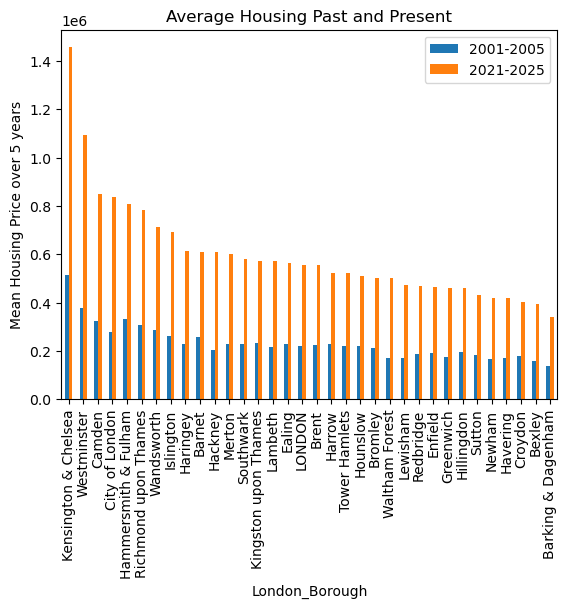

Correlation Coefficient: 0.9787744971008256


In [246]:
#Sort df_cost and make bar graph - are the same boroughs most expensive in both 5 year spans?
df_cost = df_cost.sort_values('2021-2025', ascending=False)
df_cost_ind = df_cost.set_index(df_cost.columns[0])
df_cost_ind.plot(kind='bar', title=f"Average Housing Past and Present", xlabel='London_Borough', ylabel='Mean Housing Price over 5 years')
plt.xticks(rotation=90)
plt.show()
r_matrix = np.corrcoef(df_cost['2021-2025'], df_cost['2001-2005'])
r = r_matrix[0, 1]  # off-diagonal element is the correlation coefficient
print(f"Correlation Coefficient: {r}")

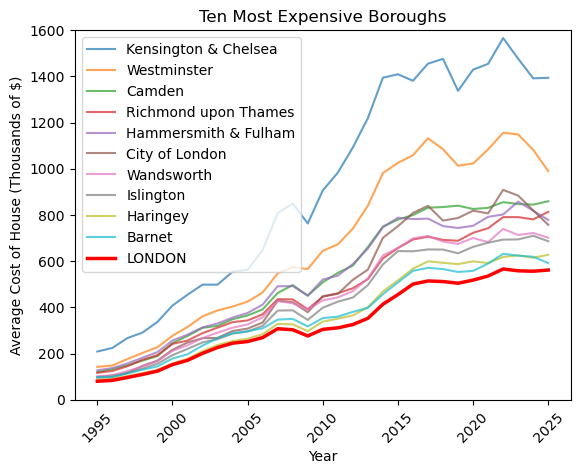

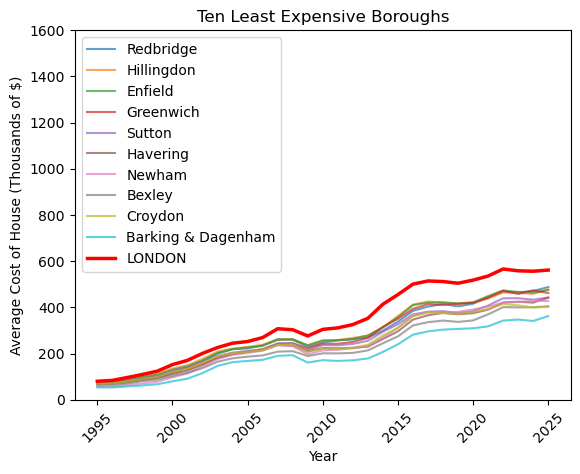

In [247]:
# The housing cost in 2001-2005 and 2021-2025 are high correlated accross boroughs, so we can use the 2021-2025 average as a measure 
# of which boroughs are expensive or cheap accross the time frame we are analyzing.
# Slice df_cost by expensive and cheap boroughs, use the segment df_pivot and plot the differences in cost in the last 20 years (2005-2025)

high_10 = df_cost[[df_cost.columns[0], '2021-2025']].head(10)  #Slice top ten
low_10 = df_cost[[df_cost.columns[0], '2021-2025']].tail(10)  #Slice bottom ten
items = [high_10, low_10]
for item in items:
    top10_full = top_ten_full(item, df_pivot, col=2025, London=London)
    numeric_cols = top10_full.columns[1:]
    if item.equals(high_10):
        title = 'Ten Most Expensive Boroughs'
    else:
        title = 'Ten Least Expensive Boroughs'
    for _, row in top10_full.iterrows():   
        if row['London_Borough'].upper() == 'LONDON':
            plt.plot(numeric_cols, row[numeric_cols]/1000,
                     label=row['London_Borough'], color='red', linewidth=2.5)
        else:
            plt.plot(numeric_cols, row[numeric_cols]/1000,
                     label=row['London_Borough'], alpha=0.7)

    plt.xlabel("Year")
    plt.ylabel("Average Cost of House (Thousands of $)")
    plt.title(title)
    plt.ylim(0, 1600)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


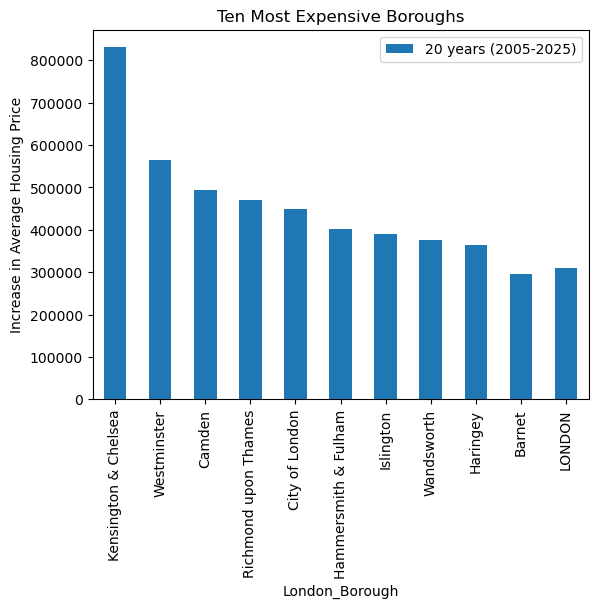

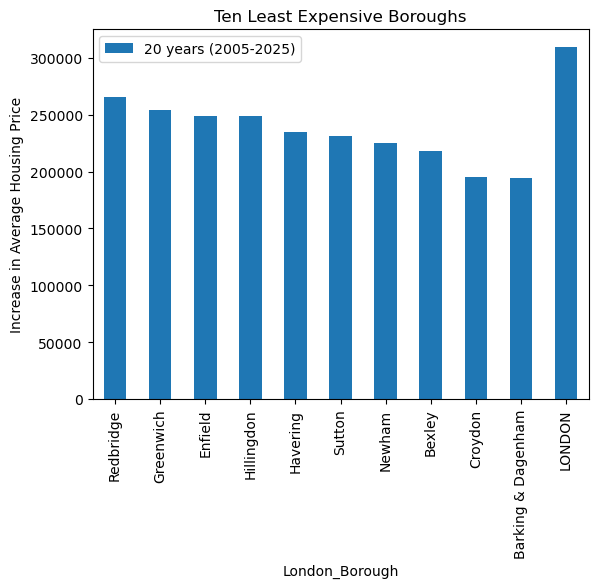

In [248]:
#Now let's look at the same high_10 and low_10 groups of boroughs with difference in cost over 20 years (2005-2025)
London_20 = pd.DataFrame({'London_Borough': ['LONDON'], '20 years (2005-2025)': [309377.5]})
for item in items:
    list_10 = [i for i in item.iloc[:, 0]] # Make list of boroughs in df col[0]
    df_10_full = df_pivot[df_pivot['London_Borough'].isin(list_10)].sort_values('20 years (2005-2025)', ascending=False) #Keep rows for boroughs in the list_10
    df_10_narrow = df_10_full[['London_Borough', '20 years (2005-2025)']]
    df_10_narrow_L = pd.concat([df_10_narrow, London_20], ignore_index=True) # Concatenate London at the bottom
    df_indexed = df_10_narrow_L.set_index(df_10_narrow_L.columns[0])
    if item.equals(high_10):
        title = 'Ten Most Expensive Boroughs'
    else:
        title = 'Ten Least Expensive Boroughs'
    df_indexed.plot(kind='bar', title=title, xlabel='London_Borough', ylabel='Increase in Average Housing Price')
    plt.xticks(rotation=90)
    plt.show()

